In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = np.array((86,15,28,11,19,71,20,22,34,26,70,25,37,18,45,68,14,36,20,15,74,30,16,25,28,61,29,32,30,41))
df = pd.DataFrame(data, columns = ['Xbar'])
# Inspect the dataset
df.head()

,Xbar
0,86
1,15
2,28
3,11
4,19


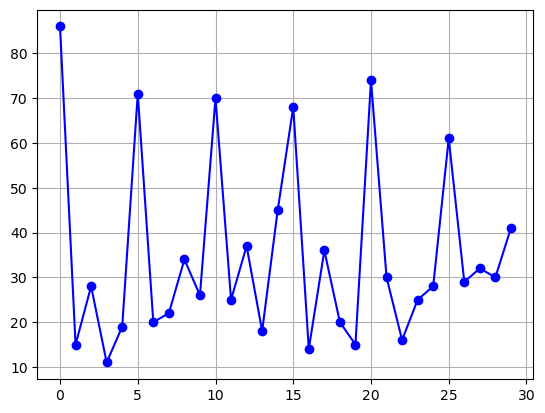

In [2]:
# Plot the data first
plt.plot(df, color='b', linestyle='-', marker='o')
plt.grid()
plt.show()

Runs test p-value = 0.263


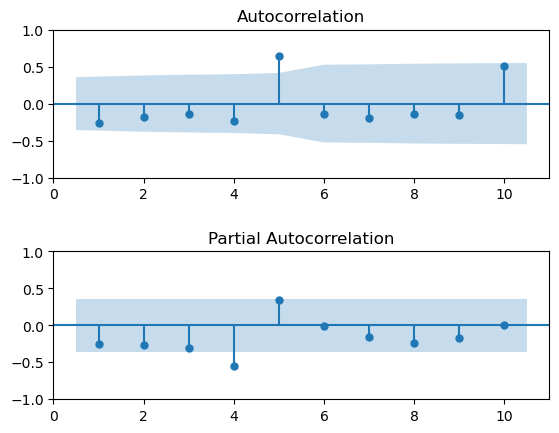

In [3]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(df['Xbar'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()


In [13]:
# Create Batch variable
df['operator']=np.tile(np.array([1,2,3,4,5]), int(len(df)/5))
df['item'] = np.repeat(np.arange(1, 7), 5) #repeate the element of the days array [from 1 to 25] for time each element


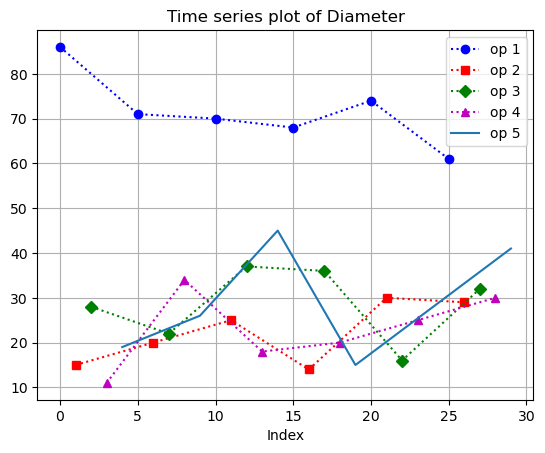

In [15]:
# Plot the data as 4 separate batches
#we need to extract the data for each batch; change the color, the line, and the marker; assign a label for each batch

plt.plot(df['Xbar'][df['operator'] == 1], 'o:b', label = 'op 1') 
plt.plot(df['Xbar'][df['operator'] == 2], 's:r', label = 'op 2') 
plt.plot(df['Xbar'][df['operator'] == 3], 'D:g', label = 'op 3') 
plt.plot(df['Xbar'][df['operator'] == 4], '^:m', label = 'op 4') 
plt.plot(df['Xbar'][df['operator'] == 5],  label = 'op 5') 

plt.xlabel('Index')
plt.legend()
plt.title('Time series plot of Diameter')
plt.grid()
plt.show()

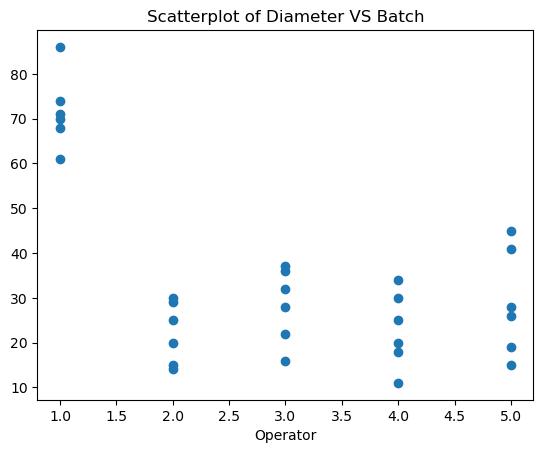

In [17]:
#Other possible graphs: scatterplot of Diameter VS batch
plt.scatter(df['operator'], df['Xbar'])
plt.xlabel('Operator')
plt.title('Scatterplot of Diameter VS Batch')
plt.show()

In [18]:
# create the dummy variable 
df['Dummy'] = np.tile(np.array([1, 0, 0, 0,0]), int(len(df)/5))


In [19]:
#calculate a regression model with constant and dummy
import statsmodels.api as sm
import qda

x = df['Dummy']
x = sm.add_constant(df['Dummy']) 
y = df['Xbar']
model = sm.OLS(y, x).fit()

qda.summary(model)

REGRESSION EQUATION
-------------------
Xbar =  + 25.667 const + 46.000 Dummy

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value    P-Value
const 25.6667   1.8129  14.1576 2.7438e-14
Dummy 46.0000   4.0538  11.3473 5.5079e-12

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
8.8815 0.8214      0.815

ANALYSIS OF VARIANCE
---------------------
    Source   DF     Adj SS     Adj MS  F-Value    P-Value
Regression  1.0 10156.8000 10156.8000 128.7611 5.5079e-12
     const  1.0 15810.6667 15810.6667 200.4371 2.7438e-14
     Dummy  1.0 10156.8000 10156.8000 128.7611 5.5079e-12
     Error 28.0  2208.6667    78.8810      NaN        NaN
     Total 29.0 12365.4667        NaN      NaN        NaN


Shapiro-Wilk test p-value on the residuals = 0.585


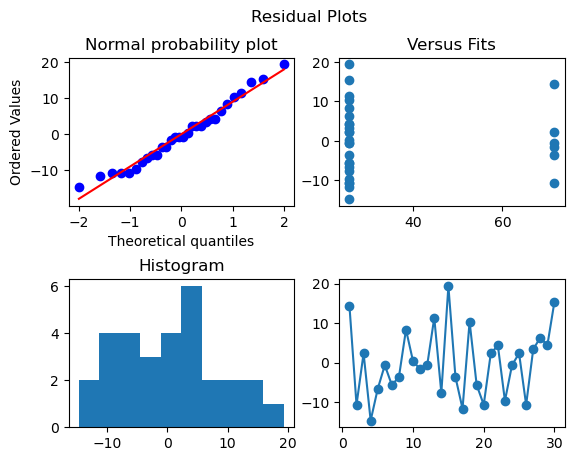

In [20]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

Runs test p-value on the residuals = 0.690


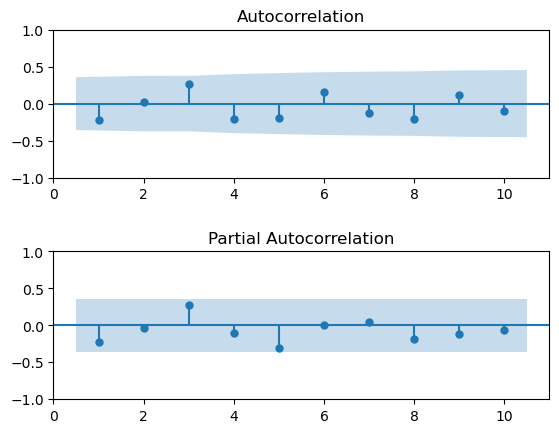

In [21]:
_, pval_runs_res = runstest_1samp(model.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

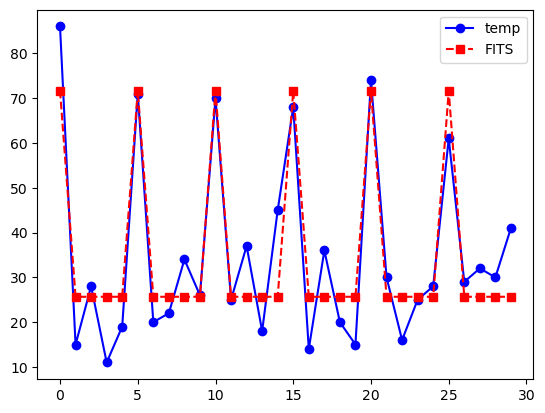

In [22]:
plt.plot(df['Xbar'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(model.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

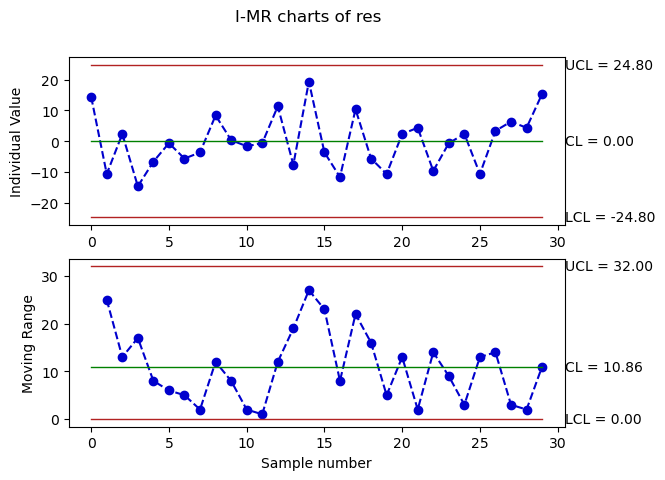

In [25]:
# Put the residuals in a dataframe
ARL=100
alpha=1/ARL
K_alpha=stats.norm.ppf(1-alpha/2)
df_SCC = pd.DataFrame(model.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res',K=K_alpha)

># STEPWISE

In [33]:
X2 = df[['operator','Dummy']]
y2 = df.iloc[:, 0]

In [34]:
stepwise = qda.StepwiseRegression(add_constant = True, direction = 'both', alpha_to_enter = 0.15, alpha_to_remove = 0.15)

# Fit the model
model2 = stepwise.fit(y2, X2)

Stepwise Regression

######################################
### Step 1
-------------------
Forward Selection

COEFFICIENTS
------------
 Term    Coef    P-Value
const 25.6667 2.7438e-14
Dummy 46.0000 5.5079e-12

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
8.8815 0.8214      0.815

######################################
### Step 2
-------------------
Forward Selection

No predictor added. Exiting stepwise.
-------------------


In [35]:
results = model2.model_fit
qda.summary(results)

REGRESSION EQUATION
-------------------
Xbar =  + 25.667 const + 46.000 Dummy

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value    P-Value
const 25.6667   1.8129  14.1576 2.7438e-14
Dummy 46.0000   4.0538  11.3473 5.5079e-12

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
8.8815 0.8214      0.815

ANALYSIS OF VARIANCE
---------------------
    Source   DF     Adj SS     Adj MS  F-Value    P-Value
Regression  1.0 10156.8000 10156.8000 128.7611 5.5079e-12
     const  1.0 15810.6667 15810.6667 200.4371 2.7438e-14
     Dummy  1.0 10156.8000 10156.8000 128.7611 5.5079e-12
     Error 28.0  2208.6667    78.8810      NaN        NaN
     Total 29.0 12365.4667        NaN      NaN        NaN


> ## point 2

Lambda = 0.426


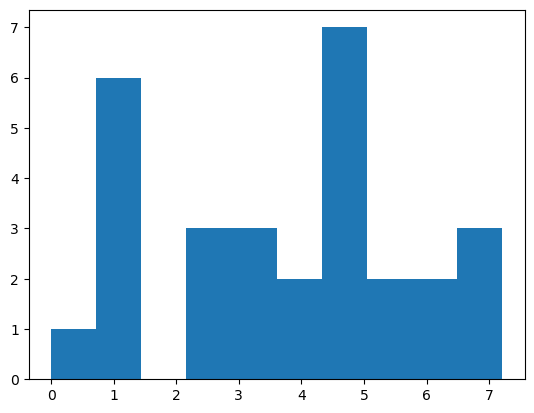

In [38]:
# Box-Cox transformation and return the transformed data
[data_BC, lmbda] = stats.boxcox(df_SCC_IMR['MR'].iloc[1:])

print('Lambda = %.3f' % lmbda)

# Plot a histogram of the transformed data
plt.hist(data_BC)
plt.show()

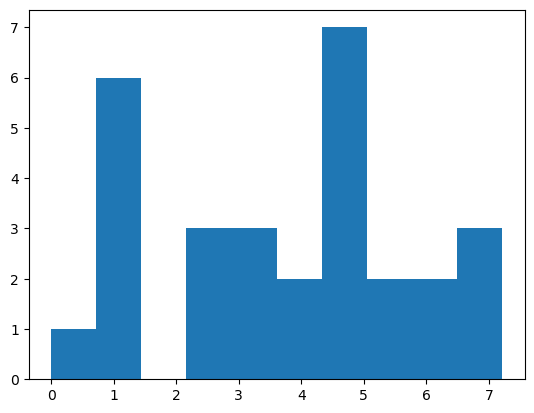

In [45]:
# Use lambda = 0.426 for Box-Cox transformation and return the transformed data
df_SCC['MR_boxcox'] = stats.boxcox(df_SCC_IMR['MR'], lmbda=0.426)

# Plot a histogram of the transformed data
plt.hist(df_SCC['MR_boxcox'])
plt.show()

Shapiro-Wilk test p-value = 0.249


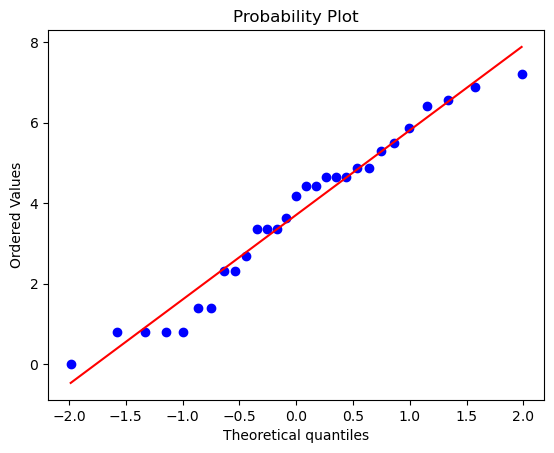

In [46]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(df_SCC['MR_boxcox'].iloc[1:])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(df_SCC['MR_boxcox'].iloc[1:], dist="norm", plot=plt)
plt.show()

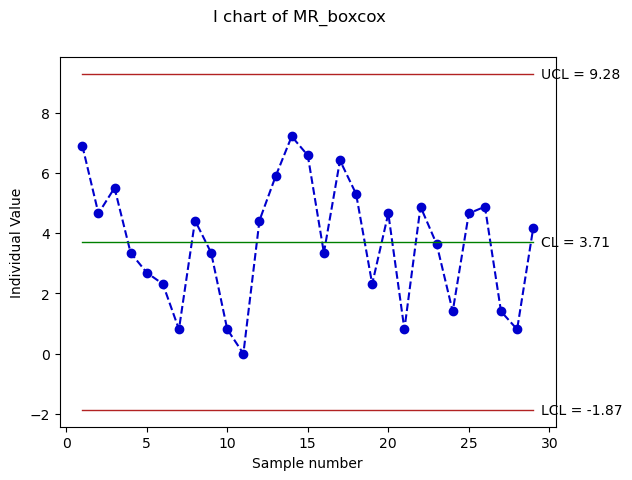

In [47]:
df_MR_boxcox = df_SCC[['MR_boxcox']].iloc[1:]
df_MR_boxcox = qda.ControlCharts.IMR(df_MR_boxcox, 'MR_boxcox', plotit=False)

# Plot the I and MR charts
fig, ax = plt.subplots(1, 1)
fig.suptitle(('I chart of MR_boxcox'))
ax.plot(df_MR_boxcox['MR_boxcox'], color='mediumblue', linestyle='--', marker='o')
ax.plot(df_MR_boxcox['I_UCL'], color='firebrick', linewidth=1)
ax.plot(df_MR_boxcox['I_CL'], color='g', linewidth=1)
ax.plot(df_MR_boxcox['I_LCL'], color='firebrick', linewidth=1)
ax.set_ylabel('Individual Value')
ax.set_xlabel('Sample number')
# add the values of the control limits on the right side of the plot
ax.text(len(df_MR_boxcox)+.5, df_MR_boxcox['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(df_MR_boxcox['I_UCL'].iloc[0]), verticalalignment='center')
ax.text(len(df_MR_boxcox)+.5, df_MR_boxcox['I_CL'].iloc[0], 'CL = {:.2f}'.format(df_MR_boxcox['I_CL'].iloc[0]), verticalalignment='center')
ax.text(len(df_MR_boxcox)+.5, df_MR_boxcox['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(df_MR_boxcox['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
ax.plot(df_MR_boxcox['I_TEST1'], linestyle='none', marker='s', color='firebrick', markersize=10)
plt.show()


> ## POint 3

In [52]:
grandmean_MR=df_SCC_IMR['MR'][1:].mean()
d2=qda.constants.getd2(2)
sigma_res=grandmean_MR/d2
print(sigma_res)

9.626257983376753


In [57]:
#operator 1
prob1=1-stats.norm.cdf((90-25.6667-46)/sigma_res)
print(prob1)
prob2345=1-stats.norm.cdf((90-25.6667)/sigma_res)
print(prob2345)

0.028421928807671026
1.1696532631333412e-11


In [58]:
expected_n1=4/5*prob2345+1/5*prob1
print(expected_n1)

0.0056843857708914316
